# Práctica 4

## Jesús Bueno Urbano
### 20078941X

In [1]:
from IPython.display import Audio
import wave
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy.io.wavfile

In [2]:
mono=wave.open('mono.wav', 'rb')
gon=wave.open('gon.wav', 'rb')

In [3]:
frmono = mono.readframes(-1)
frgon = gon.readframes(-1)

In [4]:
mmg=frmono+frgon

sampleRate = 44100.0

wavef = wave.open('monomasgon.wav','w')
wavef.setnchannels(1)
wavef.setsampwidth(2) 
wavef.setframerate(sampleRate)
wavef.writeframes(mmg)
wavef.close()

### Ejercicio 1

- Representar gráficamente el sonido mmg.

Comenzamos creando un array de numeros enteros

In [5]:
arrmmg = np.fromstring(mmg, 'Int16')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


Calculamos la duración dividiendo la longitud del array entre el rate de mmg.

**Nota:** Como al construir mmg le impusimos un rate de 44100 Hz no es necsario calcularlo previamente.

In [6]:
durammg = len(arrmmg)/44100
durammg

15.29689342403628

Hacemos una partición del intervalo de duración.

In [7]:
timemmg = np.linspace(0, durammg, num=len(arrmmg))

Ya podemos representar el sonido mmg.

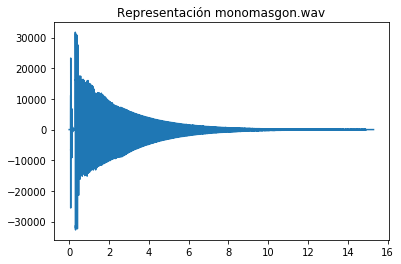

In [8]:
plt.figure(1)
plt.title('Representación monomasgon.wav')
plt.plot(timemmg,arrmmg)
plt.show()

### Ejercicio 2

- Abrir los ficheros Bass.wav y Guitar.wav. 
- Comprobar que son ficheros en estereo.
- Construir nuevos ficheros Bassmono.wav y Guitarmono.wav a partir de los ficheros estereos Bass y Guitar. 
- Construir un nuevo fichero BassGuitar.wav que por el canal 1 tenga a Bassmono y por el 2 a Guitarmono.

**Abrimos los archivos *Bass.wav* y *Guitar.wav***

In [9]:
bass = wave.open('Bass.wav', 'rb')
guitar = wave.open('Guitar.wav', 'rb')

**Comprobamos que ambos ficheros son estéreo.**

In [10]:
bassch = bass.getnchannels()
bassch

2

In [11]:
guitarch = guitar.getnchannels()
guitarch

2

**Creamos los archivos *Bassmono.wav* y *Guitarmono.wav***

In [12]:
SampleRate = 44100.0

In [13]:
frbass = bass.readframes(-1)

wavef = wave.open('Bassmono.wav','w')
wavef.setnchannels(1) 
wavef.setsampwidth(2) 
wavef.setframerate(sampleRate)
wavef.writeframes(frbass)
wavef.close()

In [14]:
frguitar = guitar.readframes(-1)

wavef = wave.open('Guitarmono.wav','w')
wavef.setnchannels(1) 
wavef.setsampwidth(2) 
wavef.setframerate(sampleRate)
wavef.writeframes(frguitar)
wavef.close()

In [15]:
type(frguitar)

bytes

Como medida de precaución comprobamos que ambos canales son mono.

In [16]:
wave.open('Bassmono.wav', 'rb').getnchannels()

1

In [17]:
wave.open('Guitarmono.wav','rb').getnchannels()

1

**Construimos un nuevo fichero *BassGuitar.wav* que por el canal 1 tenga a *Bassmono.wav* y por el 2 a *Guitarmono.wav***

In [18]:
arrbass = np.fromstring(frbass, 'Int16')
arrguitar = np.fromstring(frguitar, 'Int16')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


Comprobamos qué sonido tiene mayor longitud.

In [19]:
[len(arrbass),len(arrguitar)]

[255564, 393566]

Como *arrguitar* tiene mayor longitud, usamos este como referencia base.

In [20]:
arrbg = arrguitar
for i in range(int(len(arrbass)/2)):
    arrbg[2*i] = arrbass[2*i]

Creamos el sonido *BassGuitar.wav*

In [21]:
wavef = wave.open('BassGuitar.wav','w')
wavef.setnchannels(2) 
wavef.setsampwidth(2) 
wavef.setframerate(sampleRate)
wavef.writeframes(arrbg)
wavef.close()

In [22]:
Audio(url = 'BassGuitar.wav', autoplay = True)